# Image Week - Day 1 - Exercice 2 - Gradient Descent

<a target="_blank" href="https://colab.research.google.com/github/leclairearthur/imageweek/blob/main/exo2.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<br/><br/>

In this practical session, you have to complete the code regions marked ``### ... ###``.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
print(torch.__version__)

2.2.0+cpu


We will search for the minimum of the function $f : \mathbb{R}^2 \to \mathbb{R}$ displayed in the next cell.

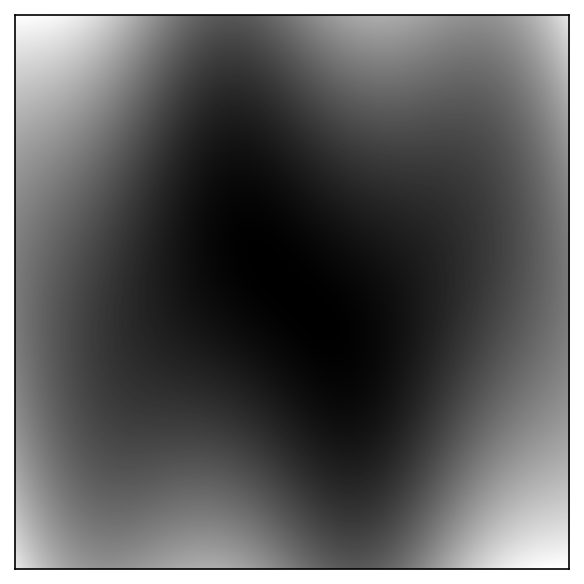

In [3]:
nr,nc = 256,256
a = 3
extent = ((-a-0.5/nc, a-0.5/nc, a-0.5/nr, -a-0.5/nr))
xs = np.linspace(-a, a, nr)
ys = np.linspace(-a, a, nc)
xm, ym = np.meshgrid(xs, ys, indexing='ij')
xm = xm.T
ym = ym.T

y = xm**2 + ym**2 - np.sin(xm*2)*ym
# other choices for fun:
#   y = np.sqrt(1+xm**2 + ym**2 - np.sin(xm*2)*ym)
#   y = 2*ym**2-np.cos(xm*3)*ym + 2*xm**2 

fig = plt.figure(dpi=150)
plt.xticks([])
plt.yticks([])
plt.imshow(y,cmap = 'gray', extent=extent)
plt.show()

**QUESTION :** Define the function f (taking as input a tensor of shape (2)), and compute its gradient with Pytorch. Check the obtained values.

In [4]:
def f(x):
    return(x[0]**2 + x[1]**2 - torch.sin(x[0]*2)*x[1])

# compute the gradient of f at point (1,0)
x = torch.tensor([1.0, 0.0], requires_grad=True)
fx = f(x)
fx.backward()
print(x.grad)

tensor([ 2.0000, -0.9093])


**QUESTION :** Implement the gradient descent (with fixed step size $\tau$). At each step, you compute the gradient by automatic differentiation ``backward()``.

Check the convergence result by plotting the values of $f$ along the iterates $(x_n)$.

If you are able to find the true solution $x_*$, you can also plot the error norm $\|x_n - x_*\|$.

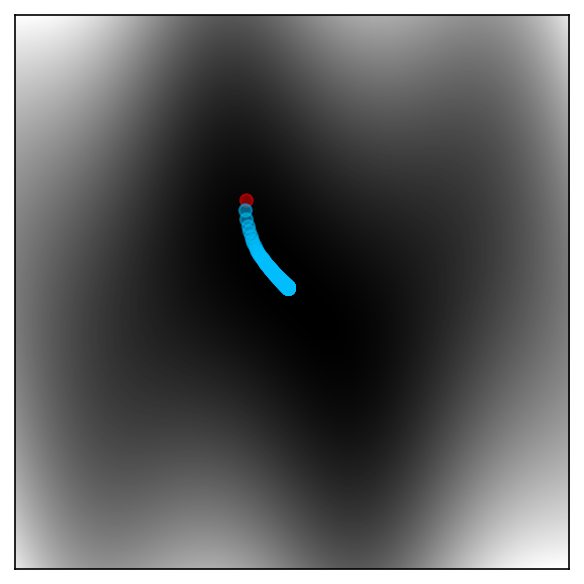

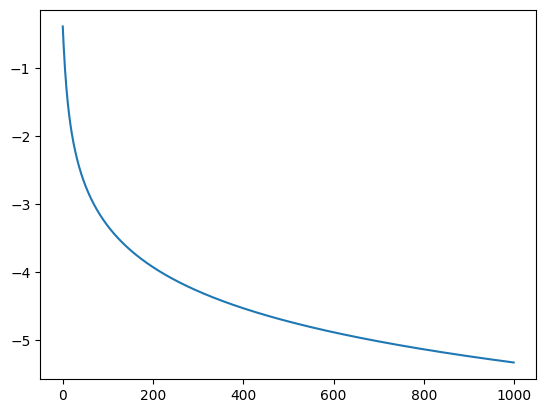

In [8]:
x0 = np.array([-0.5,-1.])   # initial point

tau = .1
N = 1000
xd = np.zeros((N,2))

fxlist = []

x = torch.tensor(x0, requires_grad = True)
for n in range(N):
    fx = f(x)
    fx.backward()
    with torch.no_grad():
        x -= tau*x.grad
    x.grad.zero_()
    xd[n,:] = x.detach().cpu()
    fxlist.append(fx.item())

fig = plt.figure(dpi=150)
plt.xticks([])
plt.yticks([])
plt.imshow(y,cmap = 'gray', extent=extent)
plt.scatter(x0[0], x0[1],c='red',alpha=.5)
plt.scatter(xd[:, 0], xd[:,1],c='deepskyblue',alpha=.5)
plt.show()

plt.figure(dpi=100)
plt.plot(np.log10(fxlist))
plt.show()

**QUESTION:** Compare by doing gradient descent with the Pytorch routine ``torch.optim.SGD`` as follows.

In [13]:
x = torch.tensor(x0, requires_grad=True)
optim = torch.optim.SGD([x], lr=tau)
losslist = []
for it in range(N):
    loss = f(x)
    losslist.append(loss.item())
    optim.zero_grad()
    loss.backward()
    optim.step()

In [14]:
for i in range(N):
    print(fxlist[i], losslist[i])

3.002896006447894 3.002896006447894
3.0532342071509446 2.9524984038654516
3.1034763754584684 2.90196041358536
3.153657322723327 2.8512524116097886
3.2038136939716915 2.8003469443405997
3.2539839203546874 2.749218878738184
3.3042081992898757 2.6978455725483528
3.3545285038962707 2.6462070630195447
3.404988623685738 2.594286272229358
3.4556342389569648 2.5420692267591534
3.506513031961982 2.4895452890041776
3.55767483870123 2.4367073968927655
3.6091718461801516 2.3835523082228782
3.6610588411655716 2.330080845222685
3.713393517961873 2.2762981343229343
3.7662368545468268 2.222213835516121
3.8196535686436666 2.1678423550986996
3.8737126680597633 2.113203035080002
3.928488113020771 2.058320312130736
3.9840596124346135 2.0032238386730175
4.040513581238977 1.9479485586219742
4.0979442924826435 1.8925347304138587
4.156455265901186 1.837027890331696
4.216160944900891 1.781478749794698
4.277188726610164 1.7259430212305737
4.339681425697271 1.670481168406715
4.403800272884592 1.6151580786484545
